# Problem Statement
# In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:

In [78]:

# Data Set Information:
# Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
# Attribute Information:
# Listing of attributes:
# >50K, <=50K.
# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
# Following is the code to load required libraries and data:


In [ ]:
#####################Import the packages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

# Import the database

In [79]:


col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=col_labels)
test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, names=col_labels)


# Clean the data

In [80]:
df = pd.concat([train, test], axis=0)


In [81]:
df['wage_class'] = df['wage_class'].apply(lambda x: 1 if x==' >50K' else 0)

In [82]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
wage_class        48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


In [84]:
# REMOVE UNKNOWNS
    
df.replace(' ?', np.nan, inplace=True)   ###  making copy for visualization


In [85]:
#################### Converting to int

df = pd.concat([df, pd.get_dummies(df['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
df.drop('workclass',axis=1,inplace=True)


In [86]:
df = pd.concat([df, pd.get_dummies(df['marital_status'],prefix='marital_status',prefix_sep=':')], axis=1)
df.drop('marital_status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
df.drop('occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
df.drop('relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['race'],prefix='race',prefix_sep=':')], axis=1)
df.drop('race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['sex'],prefix='sex',prefix_sep=':')], axis=1)
df.drop('sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['native_country'],prefix='native_country',prefix_sep=':')], axis=1)
df.drop('native_country',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['education'],prefix='education',prefix_sep=':')], axis=1)
df.drop('education', axis=1,inplace=True)

In [87]:
########### Preparing data for Training and testing 

X = np.array(df.drop(['wage_class'], 1))
y = np.array(df['wage_class'])
X = preprocessing.scale(X)

C:\Users\disiz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [88]:
#Splitting data as train and test data 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

# training model

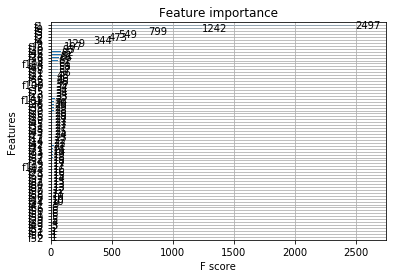

In [89]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)
plt.show()


# EVALUATING MODEL

In [90]:
predictions_train = model.predict(X_train)
print("training set auc:",accuracy_score(y_train, predictions_train))
predictions_test = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions_test))
print(model.get_params())


C:\Users\disiz\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


training set auc: 0.8925970341337858
test set auc: 0.859346208967447
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}


C:\Users\disiz\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# samples classified correctly and accuracy score

In [91]:
correct = 0

for i in range(len(predictions_test)):
    if (y_test[i] == predictions_test[i]):
        correct += 1
        
acc = accuracy_score(y_test, predictions_test)

In [75]:
print('Predicted correctly: {0}/{1}'.format(correct, len(predictions_test)))
print('Accuracy: ', correct*100/len(predictions_test), '%')

print('Error: {0:.4f}'.format(1-acc))

Predicted correctly: 12583/14653
Accuracy:  85.87320002729817 %
Error: 0.1413
